### IT412: Natural Language Processing
# Assignment1: Feature Engineering and SVM Classifier
---
**Name: SHREYA ARORA** <br>
**Student ID: 202218032**

In [15]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
data= pd.read_csv("https://raw.githubusercontent.com/shreya139/NLP/main/fake_papers_train_part_public.csv")

In [7]:
data.head()

,id,text,fake
0,1,Modern two-dimensional imaging is of such qual...,0
1,2,Background: The optimal sequence of systemic p...,1
2,5,This chapter opens with a discussion of the ef...,1
3,10,The time scale of the ultra-short-term can str...,1
4,23,Electronic nose or machine olfaction are syste...,1


In [13]:
nlp = spacy.load('en_core_web_sm')

---
<b>A. TF-IDF Feature extraction
For fake and human-generated articles, extract the TF-IDF as follows: </b>
1. TF-IDF features of tokens in text
2. TF-IDF features of POS tags
3. TF-IDF features of dependency labels

In [87]:
def spacy_tokenizer(document):
    tokens = nlp(document)
    tokens = [token.lemma_ for token in tokens if ((token.is_alpha == True or token.is_punct == True) and token.is_stop == False and token.lemma_.strip()!= '')]
    return tokens

In [92]:
def spacy_postager(document):
    tokens = nlp(document)
    tokens = [token.pos_ for token in tokens if ((token.is_alpha == True or token.is_punct == True) and token.is_stop == False and token.lemma_.strip()!= '')]
    return tokens

In [93]:
def spacy_dep(document):
    tokens = nlp(document)
    tokens = [token.dep_ for token in tokens if ((token.is_alpha == True or token.is_punct == True) and token.is_stop == False and token.lemma_.strip()!= '')]
    return tokens

In [112]:
def create_tfidf(corpus,col,tok,vocab=None):
    if vocab=='pos':
        voc = []
        for t in corpus[col]:
            doc = nlp(t)
            for token in doc:
                voc.append(token.pos_)
        voc=list(set(voc))
        lower=False
        
    elif vocab=='dep':
        voc = []
        for t in corpus[col]:
            doc = nlp(t)
            for token in doc:
                voc.append(token.dep_)
        voc=list(set(voc))
        lower=False
        
    elif vocab==None:
        voc=None
        lower=True
    
    tfidf = TfidfVectorizer(input = 'content', tokenizer = tok, vocabulary=voc, lowercase=lower)
    result = tfidf.fit_transform(corpus[col])
    dense = result.todense()
    denselist = dense.tolist()
    df = pd.DataFrame(denselist,columns=tfidf.get_feature_names_out())
    new_df = pd.concat([corpus, df.reindex(corpus.index)], axis=1)
    return new_df

##### TF-IDF of tokens:

In [113]:
token_tfidf = create_tfidf(data,'text',spacy_tokenizer)

In [114]:
token_tfidf

,id,text,fake,!,"""",#,%,&,','',...,–,—,’,‚,„,•,…,ℂ,ℝ,ℤq
0,1,Modern two-dimensional imaging is of such qual...,0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Background: The optimal sequence of systemic p...,1,0.0,0.000000,0.0,0.083238,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,This chapter opens with a discussion of the ef...,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10,The time scale of the ultra-short-term can str...,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23,Electronic nose or machine olfaction are syste...,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5345,26727,"In this paper, Shmoop uses statistical methods...",1,0.0,0.571678,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5346,26728,"In this paper, the authors examine the effects...",1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5347,26734,The possibility of using PCI Mezzanine Cards (...,0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5348,26743,Soil biodiversity is a keystone of the natural...,1,0.0,0.058080,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
##### TF-IDF of POS tags

In [115]:
pos_tfidf = create_tfidf(data, 'text',spacy_postager,'pos')

In [116]:
pos_tfidf

,id,text,fake,AUX,VERB,CCONJ,PROPN,NUM,ADJ,ADP,...,SYM,INTJ,DET,PUNCT,SCONJ,ADV,PART,NOUN,SPACE,PRON
0,1,Modern two-dimensional imaging is of such qual...,0,0.0,0.216753,0.0,0.020122,0.0,0.434723,0.028654,...,0.0,0.0,0.0,0.320935,0.0,0.055884,0.0,0.810362,0.0,0.0
1,2,Background: The optimal sequence of systemic p...,1,0.0,0.103641,0.0,0.064943,0.0,0.384549,0.000000,...,0.0,0.0,0.0,0.279674,0.0,0.043288,0.0,0.870098,0.0,0.0
2,5,This chapter opens with a discussion of the ef...,1,0.0,0.263468,0.0,0.000000,0.0,0.146782,0.000000,...,0.0,0.0,0.0,0.175547,0.0,0.040757,0.0,0.936249,0.0,0.0
3,10,The time scale of the ultra-short-term can str...,1,0.0,0.254374,0.0,0.159395,0.0,0.350746,0.000000,...,0.0,0.0,0.0,0.381347,0.0,0.000000,0.0,0.794472,0.0,0.0
4,23,Electronic nose or machine olfaction are syste...,1,0.0,0.035885,0.0,0.000000,0.0,0.287885,0.000000,...,0.0,0.0,0.0,0.215189,0.0,0.000000,0.0,0.932485,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5345,26727,"In this paper, Shmoop uses statistical methods...",1,0.0,0.225204,0.0,0.035279,0.0,0.282296,0.000000,...,0.0,0.0,0.0,0.450156,0.0,0.000000,0.0,0.815908,0.0,0.0
5346,26728,"In this paper, the authors examine the effects...",1,0.0,0.337952,0.0,0.000000,0.0,0.156416,0.000000,...,0.0,0.0,0.0,0.181872,0.0,0.036193,0.0,0.909360,0.0,0.0
5347,26734,The possibility of using PCI Mezzanine Cards (...,0,0.0,0.210725,0.0,0.565901,0.0,0.211316,0.000000,...,0.0,0.0,0.0,0.391127,0.0,0.041911,0.0,0.631820,0.0,0.0
5348,26743,Soil biodiversity is a keystone of the natural...,1,0.0,0.283600,0.0,0.000000,0.0,0.284396,0.000000,...,0.0,0.0,0.0,0.255097,0.0,0.039484,0.0,0.878667,0.0,0.0


---
##### TF-IDF of Dependency Labels

In [117]:
dep_tfidf = create_tfidf(data, 'text',spacy_dep,'dep')

In [118]:
dep_tfidf

,id,text,fake,poss,advmod,csubj,acl,ccomp,pcomp,preconj,...,meta,nummod,relcl,dep,ROOT,det,quantmod,dative,advcl,prep
0,1,Modern two-dimensional imaging is of such qual...,0,0.000000,0.082268,0.045980,0.084617,0.060757,0.018957,0.0,...,0.0,0.0,0.000000,0.000000,0.121222,0.0,0.0,0.0,0.036796,0.027579
1,2,Background: The optimal sequence of systemic p...,1,0.000000,0.062924,0.058614,0.043147,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.049963,0.046359,0.0,0.0,0.0,0.023453,0.000000
2,5,This chapter opens with a discussion of the ef...,1,0.114859,0.061458,0.000000,0.000000,0.075647,0.070810,0.0,...,0.0,0.0,0.201333,0.000000,0.135836,0.0,0.0,0.0,0.068720,0.000000
3,10,The time scale of the ultra-short-term can str...,1,0.000000,0.000000,0.000000,0.061610,0.000000,0.000000,0.0,...,0.0,0.0,0.065410,0.000000,0.132394,0.0,0.0,0.0,0.000000,0.000000
4,23,Electronic nose or machine olfaction are syste...,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.067292,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5345,26727,"In this paper, Shmoop uses statistical methods...",1,0.000000,0.000000,0.000000,0.171448,0.000000,0.000000,0.0,...,0.0,0.0,0.121348,0.000000,0.081872,0.0,0.0,0.0,0.000000,0.000000
5346,26728,"In this paper, the authors examine the effects...",1,0.000000,0.058756,0.000000,0.120867,0.000000,0.067698,0.0,...,0.0,0.0,0.000000,0.000000,0.129866,0.0,0.0,0.0,0.131399,0.000000
5347,26734,The possibility of using PCI Mezzanine Cards (...,0,0.000000,0.058160,0.000000,0.059820,0.000000,0.067010,0.0,...,0.0,0.0,0.000000,0.000000,0.128548,0.0,0.0,0.0,0.000000,0.000000
5348,26743,Soil biodiversity is a keystone of the natural...,1,0.000000,0.063762,0.000000,0.000000,0.078484,0.073466,0.0,...,0.0,0.0,0.139255,0.000000,0.140931,0.0,0.0,0.0,0.000000,0.000000


---
<b>B. SVM Classifier for detection </b>

1. Train a SVM classifier that uses 1-hot vectors as features. Report the accuracy and the confusion matrix. <br>
2. Train three SVM classifiers using the features extracted in the above
subparts (i.e. A.1, A.2, and A.3). Report the accuracy, and the confusion
matrix for each of the classifiers. <br>
3. Train a SVM classifier that uses all the features computed in part A, and
report accuracy and the confusion matrix. <br>
Report your observations about which model performs the best and why.

In [133]:
#preprocessing the text
def preprocessing(text):
    doc= nlp(text)
    newtext=""

    filteredwords= []
    for word in doc:
        if word.is_stop == False or word.like_num==True:
            filteredwords.append(word.lemma_.lower())

    newtext += " ".join(filteredwords)+" "
    return newtext

In [140]:
data = data.assign(processed=data['text'].apply(lambda x: preprocessing(x)))
data

,id,text,fake,processed
0,1,Modern two-dimensional imaging is of such qual...,0,modern two - dimensional imaging quality echoc...
1,2,Background: The optimal sequence of systemic p...,1,background : optimal sequence systemic palliat...
2,5,This chapter opens with a discussion of the ef...,1,chapter open discussion effect long wave seapo...
3,10,The time scale of the ultra-short-term can str...,1,"time scale ultra - short - term strengthen , d..."
4,23,Electronic nose or machine olfaction are syste...,1,electronic nose machine olfaction system detec...
...,...,...,...,...
5345,26727,"In this paper, Shmoop uses statistical methods...",1,"paper , shmoop use statistical method derive e..."
5346,26728,"In this paper, the authors examine the effects...",1,"paper , author examine effect surgical sterili..."
5347,26734,The possibility of using PCI Mezzanine Cards (...,0,possibility pci mezzanine cards ( pmcs ) vme m...
5348,26743,Soil biodiversity is a keystone of the natural...,1,"soil biodiversity keystone natural world , pap..."


In [164]:
vectorizer = CountVectorizer()
OHE = vectorizer.fit_transform(data['processed']).toarray()

OneHotEncoder() encoded the one doc as 1 unit, hence I have used CountVectorizer() to perform token-by-token OHE.

In [165]:
print(OHE)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [163]:
OHE.shape

(5350, 25086)

In [183]:
#SVM cannot take arrays as input, hence converting OHE to dataframe
enc_df= pd.DataFrame(OHE)
enc_df

,0,1,2,3,4,5,6,7,8,9,...,25076,25077,25078,25079,25080,25081,25082,25083,25084,25085
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
def SVM_Classifier(x, y):
    x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6, random_state=123)
    x_val, x_test, y_val, y_test = train_test_split(x_rem,y_rem, test_size=0.5, random_state=345)
    
    model = SVC()
    model.fit(x_train,y_train)
    pred_train = model.predict(x_train)
    print('Statistics of Training Dataset:')
    print("Accuracy:", accuracy_score(y_train,pred_train))
    precision = precision_score(y_train, pred_train)
    print("Precision:", precision)
    recall = recall_score(y_train, pred_train)
    print("Recall:", recall)
    F1_score = f1_score(y_train, pred_train)
    print("F1-score:", F1_score)
    
    predictions = model.predict(x_val)
    print("\n\n\nStatistics of Validation Dataset:")
    print("Accuracy:", accuracy_score(y_val,predictions))
    precision2 = precision_score(y_val, predictions)
    print("Precision:", precision2)
    recall2 = recall_score(y_val, predictions)
    print("Recall:", recall2)
    F1_score2 = f1_score(y_val, predictions)
    print("F1-score:", F1_score2)
    CM = confusion_matrix(y_val, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=model.classes_)
    disp.plot()
    plt.show()

---
### SVM Classifier using One-Hot Encoding

Statistics of Training Dataset:
Accuracy: 0.9526479750778816
Precision: 0.9362703165098375
Recall: 0.9986313868613139
F1-score: 0.9664459161147904



Statistics of Validation Dataset:
Accuracy: 0.8065420560747664
Precision: 0.8389610389610389
Recall: 0.8861454046639232
F1-score: 0.8619079386257505


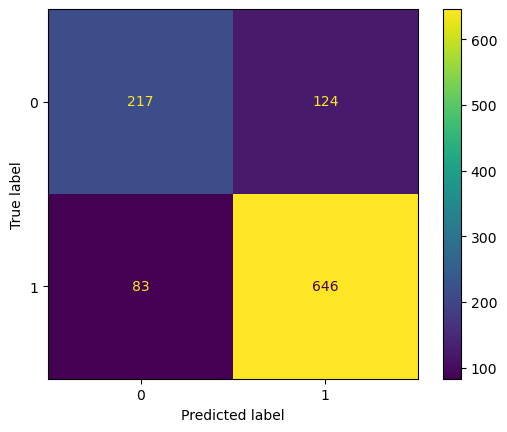

In [206]:
SVM_Classifier(enc_df,data['fake'])

According the above confusion matrix, our model was able to determine 646 positive values and 217 negative values correctly, which means it is able to classify 646 (out of 729) fake texts and 217 (out of 341) human generated texts correctly. The model is able to determine positive values with better precision than the negative values.

---
### SVM Classifier using TF-IDF

###### a. Using Token TF-IDF

Statistics of Training Dataset:
Accuracy: 0.9968847352024922
Precision: 0.9972652689152234
Recall: 0.9981751824817519
F1-score: 0.9977200182398541



Statistics of Validation Dataset:
Accuracy: 0.8373831775700935
Precision: 0.8323353293413174
Recall: 0.953360768175583
F1-score: 0.8887468030690536


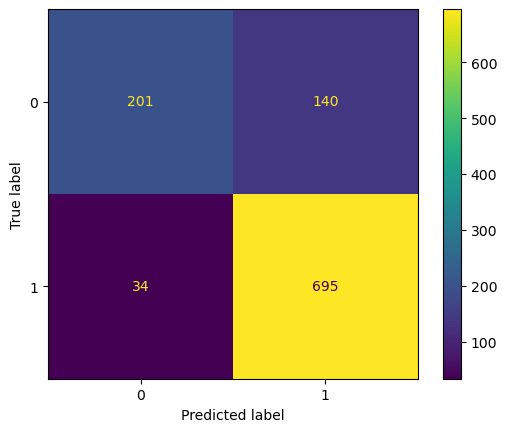

In [217]:
X_A1 = token_tfidf.iloc[:, 3:]
Y_A1 = np.array(token_tfidf.iloc[:,2])
SVM_Classifier(X_A1, Y_A1)

Again, the above model determines positives with a better precision than negatives. It has been able to classify 95% of the positive values correctly.

###### b. Using POS Tag TF-IDF

Statistics of Training Dataset:
Accuracy: 0.6828660436137072
Precision: 0.6828660436137072
Recall: 1.0
F1-score: 0.811551277304702



Statistics of Validation Dataset:
Accuracy: 0.6813084112149532
Precision: 0.6813084112149532
Recall: 1.0
F1-score: 0.8104502501389661


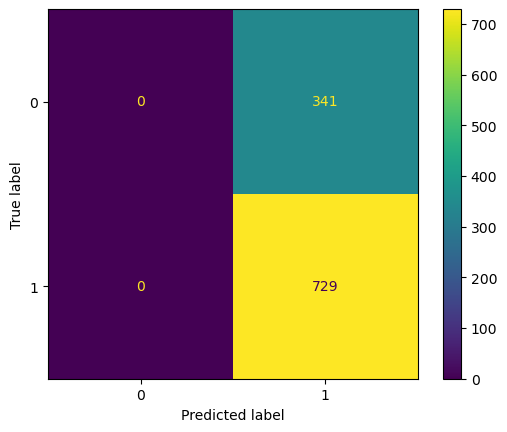

In [218]:
X_A2 = pos_tfidf.iloc[:, 3:]
Y_A2 = np.array(pos_tfidf.iloc[:,2])
SVM_Classifier(X_A2, Y_A2)

The above model classified all the texts as positive or fake. Even though the model has perfect recall, it is not able to classify the texts at all.

###### c. Using Dependency Label TF-IDF

Statistics of Training Dataset:
Accuracy: 0.7816199376947041
Precision: 0.8084402151427389
Recall: 0.8914233576642335
F1-score: 0.8479062703406379



Statistics of Validation Dataset:
Accuracy: 0.7672897196261682
Precision: 0.8045685279187818
Recall: 0.869684499314129
F1-score: 0.8358602504943968


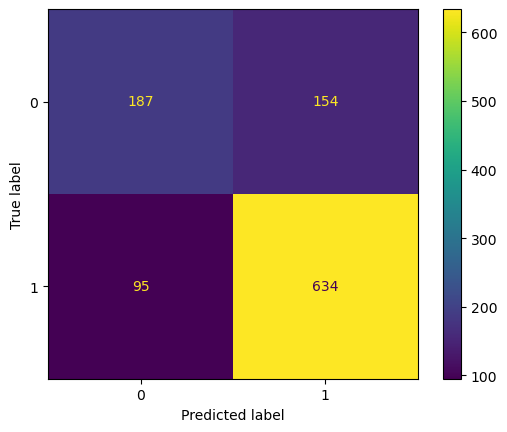

In [219]:
X_A3 = dep_tfidf.iloc[:, 3:]
Y_A3 = np.array(dep_tfidf.iloc[:,2])
SVM_Classifier(X_A3, Y_A3)

This model, as well, classifies positive values better than negative values. It failed to classify 154 negative texts correctly.

---
### SVM using Various TF-IDF Features

Statistics of Training Dataset:
Accuracy: 0.9532710280373832
Precision: 0.9513704686118479
Recall: 0.9817518248175182
F1-score: 0.9663224068253256



Statistics of Validation Dataset:
Accuracy: 0.8626168224299066
Precision: 0.8798955613577023
Recall: 0.9245541838134431
F1-score: 0.9016722408026756


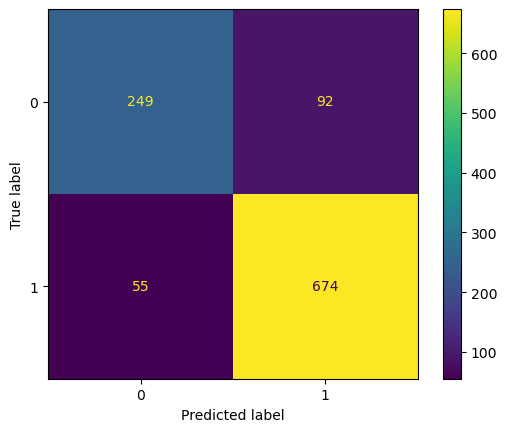

In [221]:
X_A12 = pd.concat([X_A1, X_A2.reindex(X_A1.index)], axis=1)
X_A = pd.concat([X_A12, X_A3.reindex(X_A12.index)], axis=1)
Y_A = np.array(token_tfidf.iloc[:,2])
SVM_Classifier(X_A, Y_A)

This model has been able to correctly classify 92.45% of the positive values and 73% of the negative values, which are better than any other model.

**Observations:** 

The TOKEN TF-IDF model (83.73%) gives better accuracy and recall than the One-Hot Encoding model (80.65%).

The accuracy and other statistics of the model has dropped significantly in case of POS tag TF-IDF (68.13%). Hence, it does not provide a good fit.

Dependency Labels (76.72%) provide better prediction than POS-tags but still cannot match the level of accuracy given by the tokens.

On combining the TF-IDF of all three tokenizers, **86.26%** predictions are accurate, which is the highest of all. This model also gives better precision and F1-score than any other model.

From the statistics of Validation Datasets, we can see that **Combined TF-IDF** model gives the best accuracy and precision. Hence, we will use this model to make predictions on our test data.

In [224]:
def SVM_Prediction(x, y):
    x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6, random_state=123)
    x_val, x_test, y_val, y_test = train_test_split(x_rem,y_rem, test_size=0.5, random_state=345)
    
    model = SVC()
    model.fit(x_train,y_train)
    pred_train = model.predict(x_train)
    
    predictions = model.predict(x_test)
    print("Statistics of Testing Dataset:")
    print("Accuracy:", accuracy_score(y_test,predictions))
    precision2 = precision_score(y_test, predictions)
    print("Precision:", precision2)
    recall2 = recall_score(y_test, predictions)
    print("Recall:", recall2)
    F1_score2 = f1_score(y_test, predictions)
    print("F1-score:", F1_score2)
    CM = confusion_matrix(y_test, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=model.classes_)
    disp.plot()
    plt.show()

Statistics of Testing Dataset:
Accuracy: 0.8663551401869158
Precision: 0.8740648379052369
Recall: 0.9434724091520862
F1-score: 0.9074433656957929


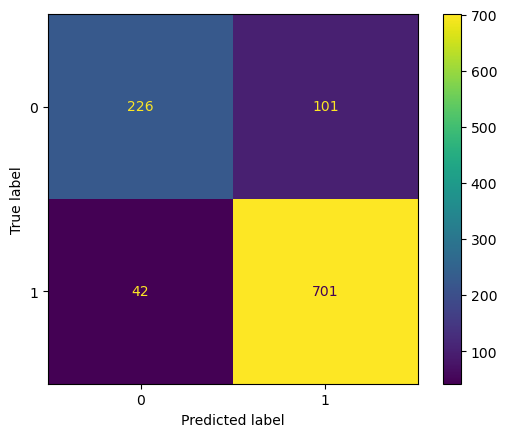

In [225]:
SVM_Prediction(X_A, Y_A)

On our final test dataset, we are able to achieve 86.63% accurate predictions with an F1-score of 0.9074.